## 南瓜品种与颜色

加载所需的库和数据集。将数据转换为包含数据子集的数据框：

让我们来看看颜色与品种之间的关系


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [12]:
col_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins[col_select]
pumpkins.dropna(inplace=True)
# pumpkins.info()

C:\Users\31225\AppData\Local\Temp\ipykernel_20948\2921947102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins.dropna(inplace=True)


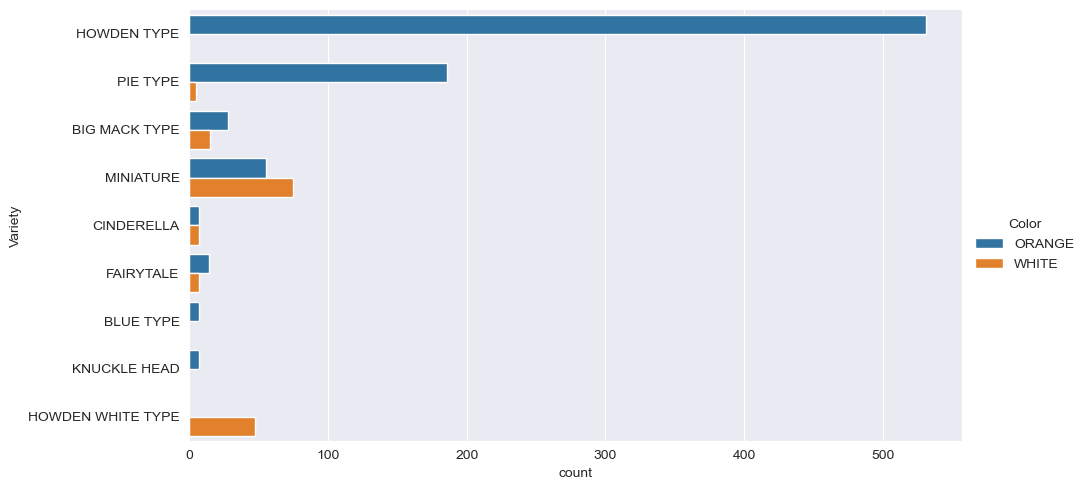

In [13]:
import seaborn as sns

sns.catplot(pumpkins, hue = 'Color',y='Variety', kind='count', aspect=2)

In [14]:
# 实现分类编码
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
item_size_cat = ['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']
ordinal_encoder = OrdinalEncoder(categories=[item_size_cat])
ordinal_features = ['Item Size']

onehot_encoder = OneHotEncoder(sparse_output= False)
onehot_features = ['City Name', 'Package', 'Variety', 'Origin']

ct = ColumnTransformer([
    ('ordinal', ordinal_encoder, ordinal_features),
    ('onehot', onehot_encoder, onehot_features)
])
ct.set_output(transform='pandas')
encoded_features  = ct.fit_transform(pumpkins)
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ordinal__Item Size                    991 non-null    float64
 1   onehot__City Name_ATLANTA             991 non-null    float64
 2   onehot__City Name_BALTIMORE           991 non-null    float64
 3   onehot__City Name_BOSTON              991 non-null    float64
 4   onehot__City Name_CHICAGO             991 non-null    float64
 5   onehot__City Name_COLUMBIA            991 non-null    float64
 6   onehot__City Name_DALLAS              991 non-null    float64
 7   onehot__City Name_DETROIT             991 non-null    float64
 8   onehot__City Name_LOS ANGELES         991 non-null    float64
 9   onehot__City Name_MIAMI               991 non-null    float64
 10  onehot__City Name_NEW YORK            991 non-null    float64
 11  onehot__City Name_

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins  = encoded_features.assign(Color = encoded_label)
# encoded_pumpkins.info()

C:\Users\31225\AppData\Local\Temp\ipykernel_20948\3701094592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins['Item Size'] = encoded_pumpkins['ordinal__Item Size']
C:\Users\31225\AppData\Local\Temp\ipykernel_20948\3701094592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=pumpkins,
D:\work\language\miniconda\envs\pytorch_39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


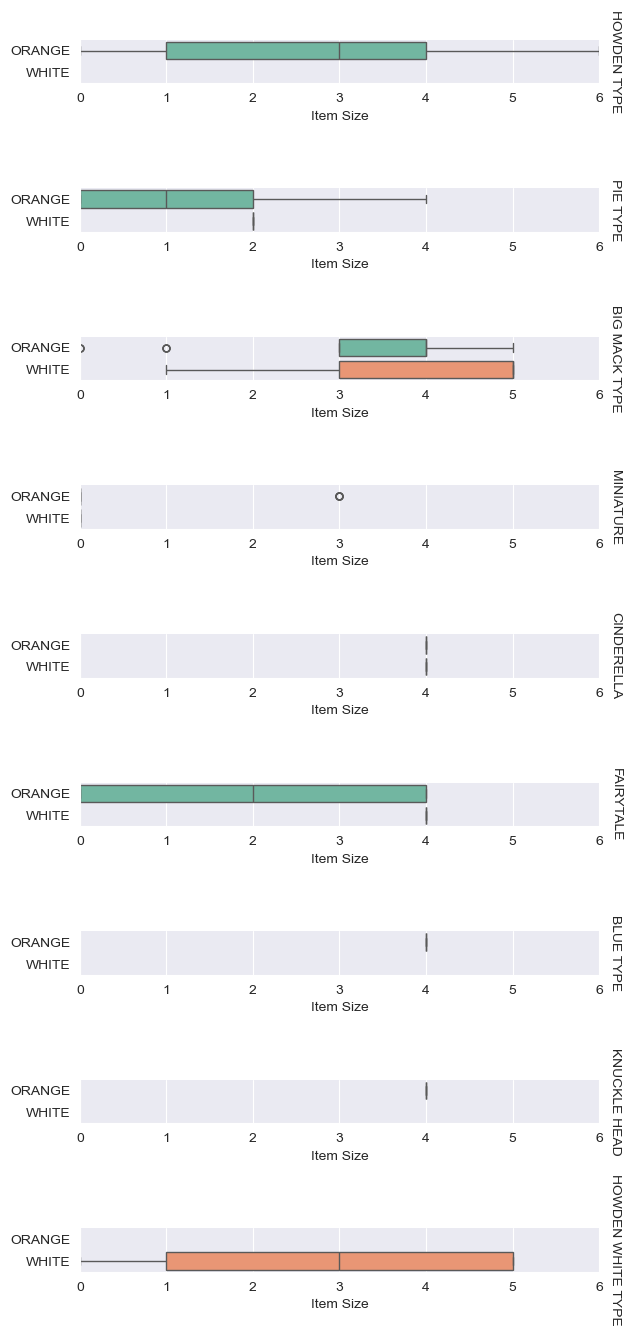

In [16]:
pumpkins['Item Size'] = encoded_pumpkins['ordinal__Item Size']

g = sns.catplot(data=pumpkins, 
            x='Item Size', y='Color', row='Variety', 
            kind='box', aspect=4, height=1.5, 
            sharex= False, margin_titles= True, palette='Set2')

g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set(xlabel='Item Size', ylabel='').set(xlim=(0,6))

In [17]:
from sklearn.model_selection import train_test_split

x = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(classification_report(y_test, pred))
print('f1 score', f1_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

f1 score 0.7457627118644068


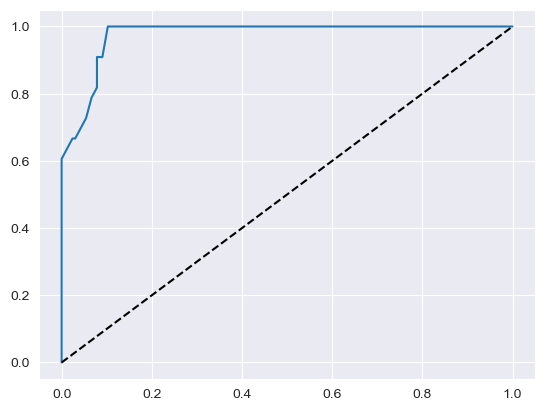

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

pred = model.predict_proba(x_test) # 预测概率
fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')